In [1]:
import starepandas
import shapely
import matplotlib.pyplot as plt

In [2]:
polygon = shapely.geometry.Polygon([[102.1, 33.1],  
                                    [101.1, 35.1], 
                                    [102.1, 35.1], 
                                    [104.1, 33.1], 
                                    [102.1, 33.1]])

indices = starepandas.from_polygon(polygon, level=8, force_ccw=True)
indices

array([694152476940566535, 694222845684744199, 595609846812770312,
       595636235091836936, 595645031184859144, 595653827277881352,
       595662623370903560, 595689011649970184, 595706603836014600,
       595724196022059016, 595732992115081224, 596067243649925128,
       596111224115036168, 596128816301080584, 694126088661499912,
       694134884754522120, 694143680847544328, 694187661312655368,
       694196457405677576, 694205253498699784, 694214049591721992,
       694328398801010696, 694574689405632520, 694583485498654728,
       694601077684699144, 694609873777721352, 694627465963765768,
       694636262056787976, 694645058149810184, 701453234148999176,
       701506010707132424, 701514806800154632, 701523602893176840,
       701532398986199048, 701541195079221256, 701549991172243464,
       701567583358287880, 701752301311754248, 701761097404776456,
       701778689590820872, 701787485683843080, 701796281776865288,
       701805077869887496, 701813873962909704, 701822670055931

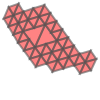

In [3]:
starepandas.to_trixels(indices, as_multipolygon=True)

In [4]:
geom = shapely.wkt.loads('''POLYGON ((61.21081709172574 35.65007233330923, 
                                      62.23065148300589 35.27066396742229, 
                                      71.34813113799026 38.25890534113216, 
                                      72.92002485544447 36.72000702569632, 
                                      69.31776411324256 31.90141225842444, 
                                      68.92667687365767 31.62018911389207, 
                                      66.34647260932442 29.88794342703618, 
                                      65.04686201361611 29.56003062592809, 
                                      64.14800215033125 29.34081920014597, 
                                      63.55026085801117 29.46833079682617, 
                                      61.69931440618083 31.37950613049267, 
                                      60.96370039250601 33.52883230237626, 
                                      60.80319339380745 34.40410187431986, 
                                      61.21081709172574 35.65007233330923))''')
indices = starepandas.from_polygon(geom, level=10, force_ccw=True)

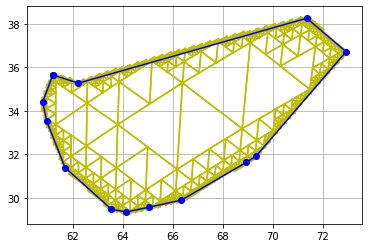

In [5]:
fig, ax = plt.subplots()
ax.grid(True)

trixels = starepandas.to_trixels(indices, as_multipolygon=False)

for triangle in trixels:
    ax.plot(*triangle.exterior.xy, color='y')
ax.plot(*geom.exterior.xy, marker='o', color='b')

0x38647e866b75c887 0x3864000000000005


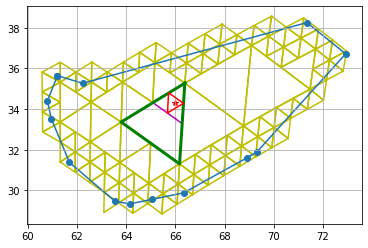

In [6]:
fig, ax = plt.subplots()
ax.grid(True)

pt = shapely.geometry.Point(66, 34.3)
pt_stare5 = starepandas.from_shapely(pt, 5)
pt_stare6 = starepandas.from_shapely(pt, 6)
pt_stare7 = starepandas.from_shapely(pt, 7)
pt_trixel5 = starepandas.to_trixels(pt_stare5)
pt_trixel6 = starepandas.to_trixels(pt_stare6)
pt_trixel7 = starepandas.to_trixels(pt_stare7)


index_ranges = starepandas.from_polygon(geom, level=7, force_ccw=True)
triangles = starepandas.to_trixels(index_ranges)
for triangle in triangles:
    ax.plot(*triangle.exterior.xy, color='y', zorder=0)
ax.plot(*geom.exterior.coords.xy, marker='o', zorder=1)


ax.plot(pt.x, pt.y, marker='*', color='r', zorder=1)
ax.plot(*pt_trixel6.exterior.coords.xy, color='m', zorder=2)
ax.plot(*pt_trixel7.exterior.coords.xy, color='r', zorder=3)

#ax.plot(*pt_trixel5.exterior.coords.xy, color='g', zorder=2)
intersection_trixel = starepandas.to_trixels([4063372763795030021])
ax.plot(*intersection_trixel.exterior.xy, color='green', 
        linewidth=3)

print(hex(4063511879588628615), hex(4063372763795030021))

## Intersection

<AxesSubplot:>

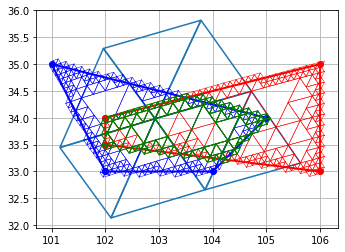

In [47]:
import pystare 
fig, ax = plt.subplots()
ax.grid(True)

polygon1 = shapely.geometry.Polygon([[102, 33], [101, 35], [105, 34], [104, 33], [102, 33]])
polygon2 = shapely.geometry.Polygon([[102, 34], [106, 35], [106, 33], [102, 33.5], [102, 34]])

range_indices1 = starepandas.from_polygon(polygon1, level=10, force_ccw=True)
range_indices2 = starepandas.from_polygon(polygon2, level=10, force_ccw=True)

triangles1 = starepandas.to_trixels(range_indices1)
triangles2 = starepandas.to_trixels(range_indices2)

for triangle in triangles1:
    ax.plot(*triangle.exterior.xy, color='blue', linewidth=0.5)

for triangle in triangles2:
    ax.plot(*triangle.exterior.xy, color='red', linewidth=0.5)
    
ax.plot(*polygon1.exterior.xy, marker='o', linewidth=2, color='blue')
ax.plot(*polygon2.exterior.xy, marker='o', linewidth=2, color='red')

intersect = pystare.intersect(range_indices1, range_indices2)
triangles3 = starepandas.to_trixels(intersect)

for triangle in triangles3:
    ax.plot(*triangle.exterior.xy, color='green', linewidth=1)
    
df2.set_trixels().plot(ax=ax, trixels=True)

### High Level

<AxesSubplot:>

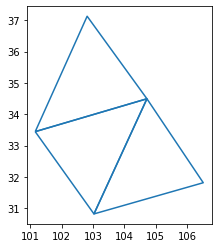

In [48]:
polygon1 = shapely.geometry.Polygon([[102, 33], [101, 35], [105, 34], [104, 33], [102, 33]])
polygon2 = shapely.geometry.Polygon([[102, 34], [106, 35], [106, 33], [102, 33.5], [102, 34]])

sids1 = starepandas.from_polygon(polygon1, level=5, force_ccw=True)
sids2 = starepandas.from_polygon(polygon2, level=5, force_ccw=True)
df = starepandas.STAREDataFrame(stare=[sids1])

intersection = df.stare_intersection(sids2)
df2 = starepandas.STAREDataFrame(stare=intersection)
df2.set_trixels().plot(trixels=True)

In [49]:
intersection.iloc[0]

array([694117292568477701, 701435641962954757, 701998591916376069])